In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA


from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr

%matplotlib inline

import warnings
# Setup
warnings.filterwarnings("ignore")

In [9]:

btc = pdr.get_data_yahoo(['BTC-USD'])
btc

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2017-02-12,999.181030,999.181030,1004.760010,996.921021,1003.520020,67530000
2017-02-13,990.642029,990.642029,1002.099976,976.002014,998.885010,100607000
2017-02-14,1004.549988,1004.549988,1011.510010,986.471008,991.734985,137946000
2017-02-15,1007.479980,1007.479980,1008.840027,1001.580017,1006.210022,89759400
2017-02-16,1027.439941,1027.439941,1033.369995,1007.650024,1007.650024,122277000
...,...,...,...,...,...,...
2022-02-07,43840.285156,43840.285156,44401.863281,41748.156250,42406.781250,28641855926
2022-02-08,44118.445312,44118.445312,45293.867188,42807.835938,43854.652344,33079398868


In [10]:
# get the data (from Yahoo Finance, BTC-USD). We are interested in all available data, Close price, daily
#btc = data.DataReader("BTC-USD",data_source='yahoo')
#btc

<AxesSubplot:title={'center':'Bitcoin Adj. Closing Price'}, xlabel='Date'>

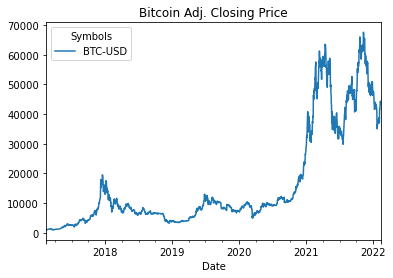

In [11]:
btc_p=btc['Adj Close']
btc_p.plot(title='Bitcoin Adj. Closing Price')

# stationarity

In [12]:
# analyze the time series. 
# stationary? adfuller test

# H0: userAcceleration.x is not stationary
result = adfuller(btc_p)
print('p-value: %.2f' % result[1])

# p-value > 0.05, we accept H0 and conclude that our time serie is not stationary

p-value: 0.78


# autocorrelation

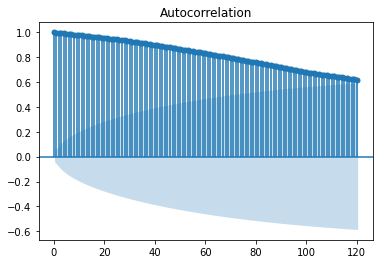

In [13]:
# autocorrelation?
# Calculate the ACF 
plot_acf(btc_p,lags=120)
# Show the data as a plot (via matplotlib)
plt.show()

# there is no significant dependency from preivious observations, so we transform the data with other method to see if there will be any autocorrelation detected

<function matplotlib.pyplot.show(close=None, block=None)>

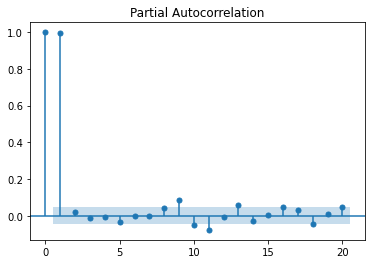

In [14]:
plot_pacf(btc_p,lags=20)
plt.show

# make our data stationary

In [15]:
# we need to transform it to stationary serie
btc['diff'] = btc['Adj Close'].diff()

result = adfuller(btc['diff'].dropna())
print(f'p-value: {result[1]}')
# now p-value < 0.05, we reject H0 and conclude that our time series is stationary

p-value: 5.353020514313457e-13


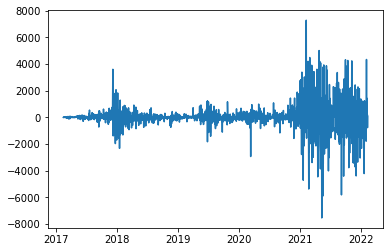

In [16]:
plt.plot(btc['diff'] )

p-value: 0.00


<function matplotlib.pyplot.show(close=None, block=None)>

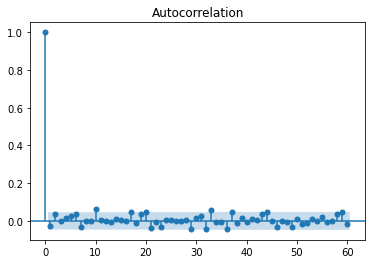

In [17]:
df_log = np.log(btc_p).diff().dropna()

result = adfuller(df_log)
print('p-value: %.2f' % result[1])
plot_acf(df_log,lags=60)
plt.show

# found lags=10 & 33 that the dependecy could be significant, for MA

<function matplotlib.pyplot.show(close=None, block=None)>

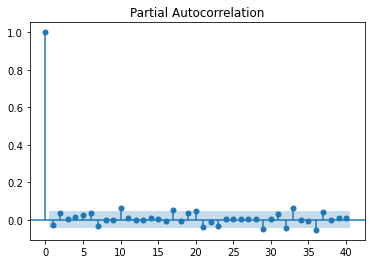

In [18]:
plot_pacf(df_log,lags=40)
plt.show
# found also lags=10 & 33 that the dependecy could be significant, for AR

# check the decomposition and seasonality


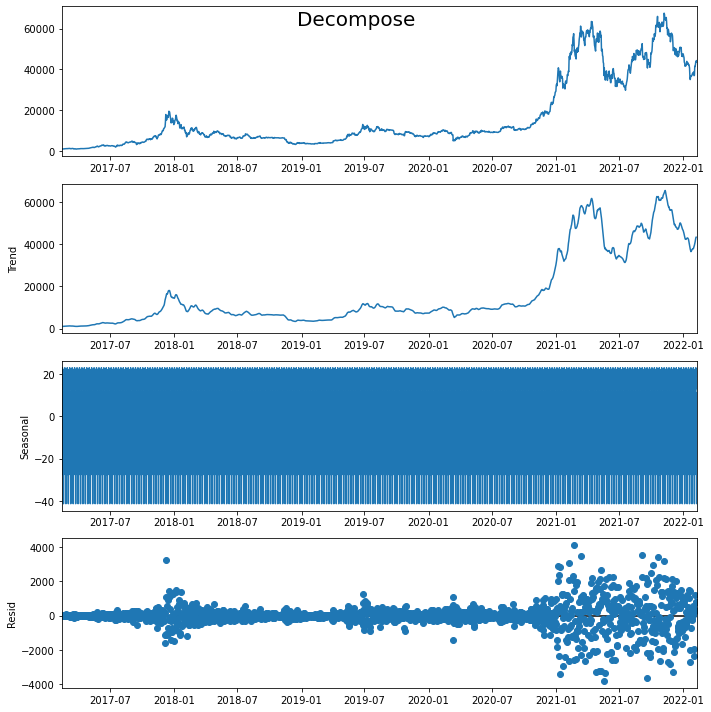

In [19]:
result_mul = seasonal_decompose(btc_p)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Decompose', fontsize=20)

plt.show()

# split into train and test 

In [20]:
split_index = round(len(btc_p)*0.7)
train = btc_p[:split_index]
test = btc_p[split_index:]
#split index = 1278

# ARMA

In [21]:
# build the model AR & MA base on train data
df_log_shift = train - train.shift()
df_log_shift.dropna(inplace=True)

model = ARMA(train, order=(10,10))
results = model.fit()

print(results.summary())

# AIC = 18711.680 for arma at order (10,10)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30682D+00    |proj g|=  8.05178D-03

At iterate    5    f=  7.30680D+00    |proj g|=  1.30020D-03

At iterate   10    f=  7.30678D+00    |proj g|=  4.91340D-04

At iterate   15    f=  7.30677D+00    |proj g|=  1.56373D-03

At iterate   20    f=  7.30677D+00    |proj g|=  4.64784D-04

At iterate   25    f=  7.30677D+00    |proj g|=  2.99849D-04

At iterate   30    f=  7.30676D+00    |proj g|=  5.60973D-04

At iterate   35    f=  7.30676D+00    |proj g|=  3.78009D-04

At iterate   40    f=  7.30676D+00    |proj g|=  4.89742D-04

At iterate   45    f=  7.30676D+00    |proj g|=  4.69846D-04

At iterate   50    f=  7.30676D+00    |proj g|=  1.89004D-04

At iterate   55    f=  7.30676D+00    |proj g|=  1.77902D-04

At iterate   60    f=  7.30676D+00    |proj g|=  2.07834D-04

At iterate   65    f=  7.3

In [22]:
def model_ARMA(order_list, var):
    results = []
    for order in (order_list):
        try: 
            model = ARMA(var, order=order).fit()
        except:
            continue
        aic = model.aic
        results.append([order, model.aic, model.bic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q)', 'AIC', 'BIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [23]:
p = range(5)
q =range(5)
order_list = [(x,y) for x in p for y in q] 

In [24]:
results_arma = model_ARMA(order_list, train.dropna())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.51569D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   9.516D+00
  F =   9.5156918639426813     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.48466D+00    |proj g|=  4.44444D-04

At iterate   25    f=  8.48466D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     34      1     0     0   3.553D-07   8.485D+00
  F =   8.4846618414172799     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16294D+00    |proj g|=  2.25212D-02

At iterate    5    f=  8.16136D+00    |proj g|=  1.52589D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99124D+00    |proj g|=  2.29063D-02

At iterate    5    f=  7.98985D+00    |proj g|=  1.64846D-04

At iterate   10    f=  7.98985D+00    |proj g|=  1.29675D-05

At iterate   15    f=  7.98985D+00    |proj g|=  2.87059D-04

At iterate   20    f=  7.98982D+00    |proj g|=  3.67590D-03

At iterate   25    f=  7.98915D+00    |proj g|=  7.37286D-03

At iterate   30    f=  7.98816D+00    |proj g|=  4.31655D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33502D+00    |proj g|=  1.59792D-03

At iterate    5    f=  7.33475D+00    |proj g|=  2.39808D-06

At iterate   10    f=  7.33475D+00    |proj g|=  3.55271D-06

At iterate   15    f=  7.33471D+00    |proj g|=  5.10703D-05

At iterate   20    f=  7.33454D+00    |proj g|=  3.28626D-06

At iterate   25    f=  7.33454D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     27     64      2     0     0   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.33438D+00    |proj g|=  1.53033D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     59      1     0     0   1.530D-03   7.334D+00
  F =   7.3343761073605016     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33471D+00    |proj g|=  1.50555D-03

At iterate    5    f=  7.33448D+00    |proj g|=  2.25775D-04

At iterate   10    f=  7.33448D+00    |proj g|=  2.66456D-07

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33409D+00    |proj g|=  1.05826D-03

At iterate    5    f=  7.33397D+00    |proj g|=  5.00133D-04

At iterate   10    f=  7.33397D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     14      1     0     0   1.776D-07   7.334D+00
  F =   7.3339661557888212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  7.33445D+00    |proj g|=  3.31291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     45      1     0     0   6.404D-05   7.334D+00
  F =   7.3344499692585599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33434D+00    |proj g|=  1.44826D-03

At iterate    5    f=  7.33411D+00    |proj g|=  2.72671D-05

At iterate   10    f=  7.33410D+00    |proj g|=  1.33227D-06

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  7.33393D+00    |proj g|=  4.06786D-05

At iterate   45    f=  7.33393D+00    |proj g|=  6.11955D-05

At iterate   50    f=  7.33393D+00    |proj g|=  2.22045D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     52    104      2     0     0   1.776D-07   7.334D+00
  F =   7.3339332712039704     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33404D+00    |proj g|=  1.00453D-03

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     34      1     0     0   3.553D-07   7.334D+00
  F =   7.3337818942429251     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33285D+00    |proj g|=  1.81313D-03


 This problem is unconstrained.



At iterate    5    f=  7.33259D+00    |proj g|=  4.76152D-04

At iterate   10    f=  7.33258D+00    |proj g|=  7.46248D-04

At iterate   15    f=  7.33256D+00    |proj g|=  5.01821D-05
  ys=-2.282E-12  -gs= 2.779E-12 BFGS update SKIPPED

At iterate   20    f=  7.33256D+00    |proj g|=  4.44089D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     33      1     1     0   4.441D-07   7.333D+00
  F =   7.3325639532226878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33444D+00    |proj g|=  9.99734D-04

At iterate    5    f=  7.33433D+00    |proj g|=  3.55271D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     16      1     0     0   0.000D+00   7.334D+00
  F =   7.3343256169442972     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 v

 This problem is unconstrained.



At iterate   35    f=  7.32802D+00    |proj g|=  1.63425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     53      1     0     0   1.137D-05   7.328D+00
  F =   7.3280180162813711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32811D+00    |proj g|=  1.36771D-03

At iterate    5    f=  7.32807D+00    |proj g|=  2.21192D-03

At iterate   10    f=  7.32802D+00    |proj g|=  3.26494D-04

At iterate   15    f=  7.32802D+00    |proj g|=  2.52598D-04

At iterate   20    f=  7.32801D+00    |proj g|=  3.24629D-04

At iterate   25    f=  7.32801D+00    |proj g|=  2.64411D-04

At iterate   30    f=  7.32801D+00    |proj g|=  7.35412D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  7.32801D+00    |proj g|=  6.66134D-06

At iterate   40    f=  7.32801D+00    |proj g|=  4.88498D-06

At iterate   45    f=  7.32801D+00    |proj g|=  1.68754D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     86      2     0     0   1.688D-06   7.328D+00
  F =   7.3280083085723282     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32797D+00    |proj g|=  5.84039D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  7.32795D+00    |proj g|=  6.34337D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     39      1     0     0   3.926D-05   7.328D+00
  F =   7.3279449079683232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33440D+00    |proj g|=  1.01386D-03

At iterate    5    f=  7.33428D+00    |proj g|=  2.13163D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32811D+00    |proj g|=  1.38405D-03

At iterate    5    f=  7.32802D+00    |proj g|=  1.05151D-03

At iterate   10    f=  7.32802D+00    |proj g|=  5.56089D-04

At iterate   15    f=  7.32802D+00    |proj g|=  3.55094D-04

At iterate   20    f=  7.32801D+00    |proj g|=  1.71596D-03

At iterate   25    f=  7.32801D+00    |proj g|=  9.17488D-05

At iterate   30    f=  7.32801D+00    |proj g|=  1.50990D-05

At iterate   35    f=  7.32801D+00    |proj g|=  4.44089D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32793D+00    |proj g|=  1.09823D-03

At iterate    5    f=  7.32791D+00    |proj g|=  1.00695D-02

At iterate   10    f=  7.32786D+00    |proj g|=  2.12861D-03

At iterate   15    f=  7.32785D+00    |proj g|=  4.06164D-04

At iterate   20    f=  7.32785D+00    |proj g|=  8.45990D-04

At iterate   25    f=  7.32785D+00    |proj g|=  8.66418D-04

At iterate   30    f=  7.32784D+00    |proj g|=  4.28102D-05
  ys=-2.784E-10  -gs= 7.481E-10 BFGS update SKIPPED

At iterate   35    f=  7.32784D+00    |proj g|=  2.21156D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32889D+00    |proj g|=  1.16298D-03

At iterate    5    f=  7.32884D+00    |proj g|=  2.48042D-03

At iterate   10    f=  7.32879D+00    |proj g|=  5.36016D-04

At iterate   15    f=  7.32878D+00    |proj g|=  8.61533D-05

At iterate   20    f=  7.32878D+00    |proj g|=  1.54987D-04

At iterate   25    f=  7.32878D+00    |proj g|=  1.11022D-05

At iterate   30    f=  7.32878D+00    |proj g|=  1.33227D-06

At iterate   35    f=  7.32878D+00    |proj g|=  2.93099D-06


 This problem is unconstrained.



At iterate   40    f=  7.32878D+00    |proj g|=  3.19744D-06

At iterate   45    f=  7.32878D+00    |proj g|=  3.09974D-05

At iterate   50    f=  7.32878D+00    |proj g|=  7.10543D-06

At iterate   55    f=  7.32878D+00    |proj g|=  4.70735D-06

At iterate   60    f=  7.32878D+00    |proj g|=  1.57208D-05

At iterate   65    f=  7.32878D+00    |proj g|=  2.13163D-06

At iterate   70    f=  7.32878D+00    |proj g|=  4.44089D-07



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     71    108      2     0     0   1.066D-06   7.329D+00
  F =   7.3287822231996298     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [25]:
results_arma

,"(p, q)",AIC,BIC
0,"(3, 2)",18744.414050,18780.485411
1,"(4, 2)",18746.387676,18787.612089
2,"(3, 3)",18746.389237,18787.613650
3,"(4, 3)",18747.965597,18794.343062
4,"(3, 4)",18748.227185,18794.604649
5,"(4, 4)",18752.367362,18803.897879
6,"(1, 0)",18753.078661,18768.537816
7,"(1, 1)",18754.665330,18775.277537
8,"(2, 0)",18754.854121,18775.466328
9,"(2, 1)",18755.533441,18781.298699


In [26]:
results_arma[results_arma.AIC == results_arma.AIC.min()]

,"(p, q)",AIC,BIC
0,"(3, 2)",18744.41405,18780.485411


In [27]:
results_arma[results_arma.BIC == results_arma.BIC.min()]

,"(p, q)",AIC,BIC
6,"(1, 0)",18753.078661,18768.537816


# Arima

In [29]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.9/603.9 KB 6.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


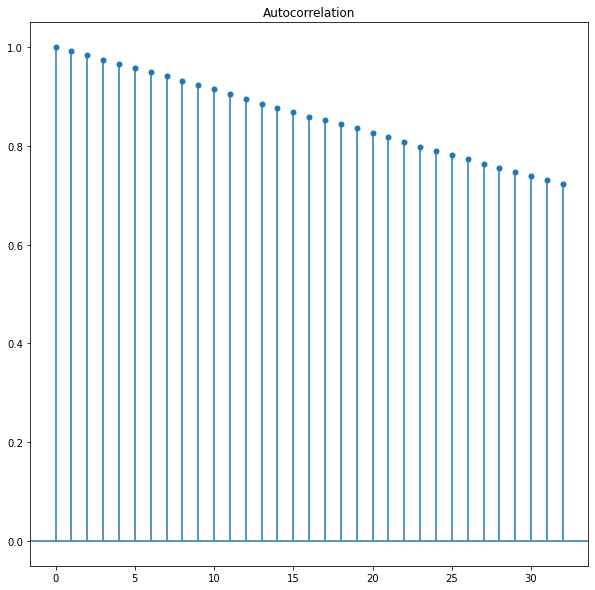

In [31]:
import pmdarima
pmdarima.plot_acf(train)

In [32]:
# has in-built auto-stationary, but better to make it stationary first, then use this model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,  seasonal=True, m=12)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=18730.287, Time=2.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=18733.975, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=18736.836, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=18736.769, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=18732.615, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=18742.731, Time=0.35 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=18742.802, Time=0.38 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=18731.774, Time=8.84 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=18732.225, Time=8.90 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=18741.527, Time=0.25 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=18742.700, Time=1.60 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=18735.250, Time=6.93 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=18737.784, Time=10.78 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=18739.425, Time=1.49 sec
 ARI

### so ARIMA has a lower AIC, so I will train my model with ARIMA(3,1,2)

# train model

In [33]:
arima312 = ARIMA(btc_p, order=(3,1,2))
arima312_fit = arima312.fit()
print(arima312_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                BTC-USD   No. Observations:                 1826
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -15077.965
Date:                Fri, 11 Feb 2022   AIC                          30167.930
Time:                        16:04:31   BIC                          30200.986
Sample:                    02-12-2017   HQIC                         30180.124
                         - 02-11-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0879      0.311      0.283      0.777      -0.521       0.697
ar.L2          0.8922      0.278      3.208      0.001       0.347       1.437
ar.L3          0.0174      0.019      0.926      0.3

# prediction

In [34]:
test.loc['2022-02-06 00:00:00', 'BTC-USD']

42412.43359375

In [35]:
def predictions_5(predictions):
    result=[test.loc['2022-02-06 00:00:00', 'BTC-USD']]
    for i in range(1,6):
        result.append(result[-1]+predictions[i])
    return result

In [36]:
pred_date = pd.date_range("2022-02-06", periods=6, freq="D")
pred_date

DatetimeIndex(['2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11'],
              dtype='datetime64[ns]', freq='D')

In [37]:
pred = arima312_fit.predict(start='2022-02-06 00:00:00', end='2022-02-11 00:00:00')
pred

2022-02-06    41454.584155
2022-02-07    42379.681730
2022-02-08    43819.465909
2022-02-09    44107.235133
2022-02-10    44340.543467
2022-02-11    43580.612120
Freq: D, Name: predicted_mean, dtype: float64

In [38]:
result = pd.DataFrame(pred)
result

,predicted_mean
2022-02-06,41454.584155
2022-02-07,42379.681730
2022-02-08,43819.465909
2022-02-09,44107.235133
2022-02-10,44340.543467
2022-02-11,43580.612120
